# "Full Metadata" Spreadsheet (working title)

See [ticket 576](https://app.zenhub.com/workspaces/dcp-ingest-product-development-5f71ca62a3cb47326bdc1b5c/issues/ebi-ait/dcp-ingest-central/576)

This is an initial attempt for enabling data consumers to explore the metadata of an HCA project with common simple tools with minimal coding such as Excel Pivot Tables.

- 1st draft - v0.1 - metadata from sequence files to donors - [see example]()
- next up - analysis files

In [93]:
spreadsheet = './data/RasaSpaceandTime250122.xlsx'
# Sequence file, Image file, Analysis file
report_entity = 'Image file' 
version = '0.3'

* TODO: skip unnecessary lines
* TODO: natural language column names vs variable names
* TODO: render graph
* TODO: analysis file linking
* DONE: handle CSV fields (separated by ||)

Talk with Wei

- TODO: analysis file -> imaged specimen <- image file
- TODO: same for analysis file -> cell suspension <- sequence file
- analysis file and image file are n:n relation

Define an Entity Relationship model (entity is a worksheet)

In [14]:
from dataclasses import dataclass

@dataclass
class SequencingProtocol:
    SEQUENCING_PROTOCOL_ID_Required: str
        
@dataclass
class LibraryPreparationProtocol:
    LIBRARY_PREPARATION_PROTOCOL_ID: str

@dataclass
class DissociationProtocol:
    DISSOCIATION_PROTOCOL_ID:str

@dataclass
class CollectionProtocol:
    COLLECTION_PROTOCOL_ID:str

@dataclass
class AnalysisProtocol:
    ANALYSIS_PROTOCOL_ID:str
        
@dataclass
class DonorOrganism:
    DONOR_ORGANISM_ID:str 
        
@dataclass
class SpecimenFromOrganism:
    SPECIMEN_FROM_ORGANISM_ID:str
    COLLECTION_PROTOCOL_ID:CollectionProtocol
    INPUT_DONOR_ORGANISM_ID:DonorOrganism
        
@dataclass
class EnrichmentProtocol:
    ENRICHMENT_PROTOCOL_ID:str
            
@dataclass
class CellSuspension:
    CELL_SUSPENSION_ID: str
    ENRICHMENT_PROTOCOL_ID:EnrichmentProtocol
    INPUT_SPECIMEN_FROM_ORGANISM_ID:SpecimenFromOrganism
    DISSOCIATION_PROTOCOL_ID:DissociationProtocol
    
@dataclass
class SequenceFile:
    SEQUENCING_PROTOCOL_ID_Required: SequencingProtocol
    LIBRARY_PREPARATION_PROTOCOL_ID_Required: LibraryPreparationProtocol
    INPUT_CELL_SUSPENSION_ID_Required: CellSuspension

        
@dataclass
class ImagingPreparationProtocol:
    IMAGING_PREPARATION_PROTOCOL_ID:str

        
@dataclass
class ImagedSpecimen:
    IMAGED_SPECIMEN_ID_Required:str
    INPUT_SPECIMEN_FROM_ORGANISM_ID_Required:SpecimenFromOrganism
    IMAGING_PREPARATION_PROTOCOL_ID_Required:ImagingPreparationProtocol


@dataclass
class AnalysisFile:
    ANALYSIS_PROTOCOL_ID_Required: AnalysisProtocol
    IMAGED_SPECIMEN_ID_Required:ImagedSpecimen
    CELL_SUSPENSION_ID_Required:CellSuspension
    LIBRARY_PREPARATION_PROTOCOL_ID_Required:LibraryPreparationProtocol
    SEQUENCING_PROTOCOL_ID_Required:SequencingProtocol

        
@dataclass
class ImagingProtocol:
    IMAGING_PROTOCOL_ID:str

        
@dataclass
class ImageFile:
    INPUT_IMAGED_SPECIMEN_ID:ImagedSpecimen
    IMAGING_PROTOCOL_ID:ImagingProtocol


/tmp/ipykernel_763/438060539.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


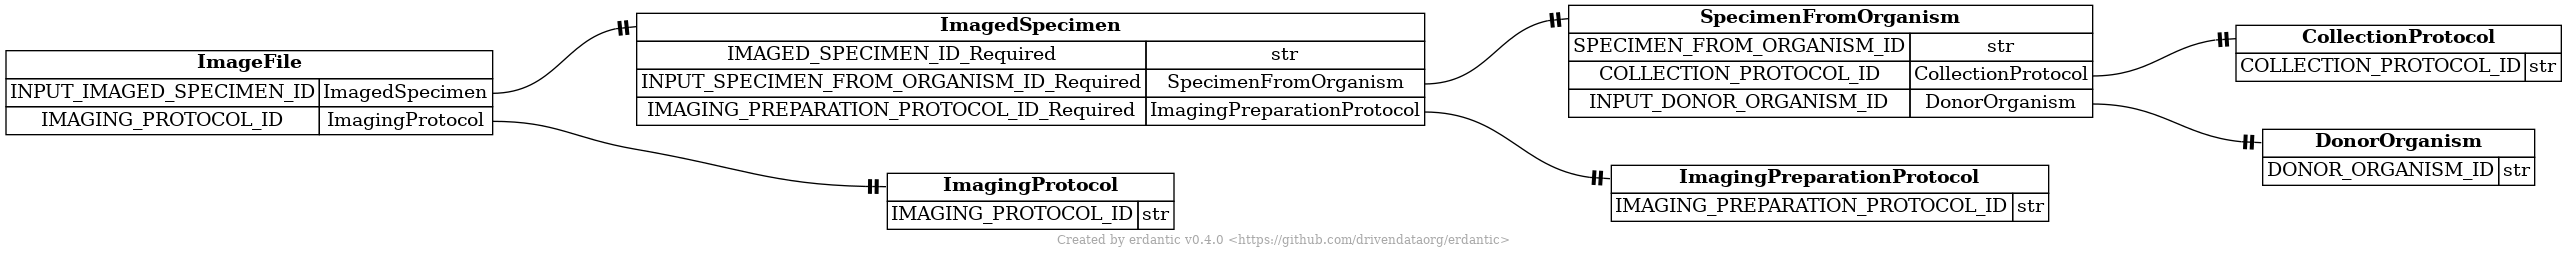

In [21]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import erdantic as erd
diagram = erd.create(ImageFile)
diagram

In [83]:
from collections import namedtuple       
Link = namedtuple("Link", 'source target source_field target_field')
        
# TODO: links list is assumed to be topologically sorted, in the future - sort
links = [
    Link('Image file', 'Imaged specimen', 'INPUT IMAGED SPECIMEN ID (Required)', 'IMAGED SPECIMEN ID (Required)'),
    Link('Image file', 'Imaging protocol', 'IMAGING PROTOCOL ID (Required)','IMAGING PROTOCOL ID (Required)'),
    Link('Imaged Specimen', 'Specimen from organism', 'INPUT SPECIMEN FROM ORGANISM ID (Required)', 'SPECIMEN FROM ORGANISM ID (Required)'),
    Link('Imaged Specimen', 'Imaging preparation protocol', 'IMAGING PREPARATION PROTOCOL ID (Required)', 'IMAGING PREPARATION PROTOCOL ID (Required)'),

#     Link('Sequence file', 'Sequencing protocol', 'SEQUENCING PROTOCOL ID (Required)','SEQUENCING PROTOCOL ID (Required)'),
#     Link('Sequence file','Library preparation protocol', 'LIBRARY PREPARATION PROTOCOL ID (Required)', 'LIBRARY PREPARATION PROTOCOL ID (Required)'),
#    Link('Sequence file', 'Cell suspension', 'INPUT CELL SUSPENSION ID (Required)','CELL SUSPENSION ID (Required)'),
#    Link('Cell suspension', 'Enrichment protocol','ENRICHMENT PROTOCOL ID (Required)','ENRICHMENT PROTOCOL ID (Required)'),
#    Link('Cell suspension', 'Specimen from organism','INPUT SPECIMEN FROM ORGANISM ID (Required)','SPECIMEN FROM ORGANISM ID (Required)'),
#    Link('Cell suspension', 'Dissociation protocol','DISSOCIATION PROTOCOL ID (Required)','DISSOCIATION PROTOCOL ID (Required)'),
    Link('Specimen from organism', 'Collection protocol', 'COLLECTION PROTOCOL ID (Required)','COLLECTION PROTOCOL ID (Required)'),
    Link('Specimen from organism', 'Donor organism','INPUT DONOR ORGANISM ID (Required)','DONOR ORGANISM ID (Required)'),

#     Link('Analysis file', 'Analysis protocol', 'ANALYSIS PROTOCOL ID (Required)', 'ANALYSIS PROTOCOL ID'),
#     Link('Analysis file', 'Cell suspension', 'CELL SUSPENSION ID (Required)', 'CELL SUSPENSION ID (Required)'),
#     Link('Analysis file', 'Imaged specimen', 'IMAGED SPECIMEN ID (Required)', 'IMAGED SPECIMEN ID (Required)'),
#     Link('Analysis file', 'Library preperation protocol', 'LIBRARY PREPARATION PROTOCOL ID (Required)', 'LIBRARY PREPARATION PROTOCOL ID (Required)'),
#     Link('Analysis file', 'Sequencing protocol', 'SEQUENCING PROTOCOL ID (Required)', 'SEQUENCING PROTOCOL ID (Required)'),
    
]

{('Sequence file',
  'Sequencing protocol'): Text(-0.2643759231720494, -0.27984440274762945, 'SEQUENCING PROTOCOL ID (Required)\n->SEQUENCING PROTOCOL ID (Required)'),
 ('Sequence file',
  'Library preparation protocol'): Text(-0.2654586454667748, -0.4847988415498803, 'LIBRARY PREPARATION PROTOCOL ID (Required)\n->LIBRARY PREPARATION PROTOCOL ID (Required)'),
 ('Sequence file',
  'Cell suspension'): Text(-0.08120295043516462, -0.2758757293326592, 'INPUT CELL SUSPENSION ID (Required)\n->CELL SUSPENSION ID (Required)'),
 ('Sequencing protocol',
  'Analysis file'): Text(-0.31207337245909306, -0.06724270455686507, 'SEQUENCING PROTOCOL ID (Required)\n->SEQUENCING PROTOCOL ID (Required)'),
 ('Cell suspension',
  'Enrichment protocol'): Text(0.054436647108306646, -0.30126053172715306, 'ENRICHMENT PROTOCOL ID (Required)\n->ENRICHMENT PROTOCOL ID (Required)'),
 ('Cell suspension',
  'Specimen from organism'): Text(0.2449753994096963, -0.12533029137403462, 'INPUT SPECIMEN FROM ORGANISM ID (Requi

<Figure size 432x288 with 0 Axes>

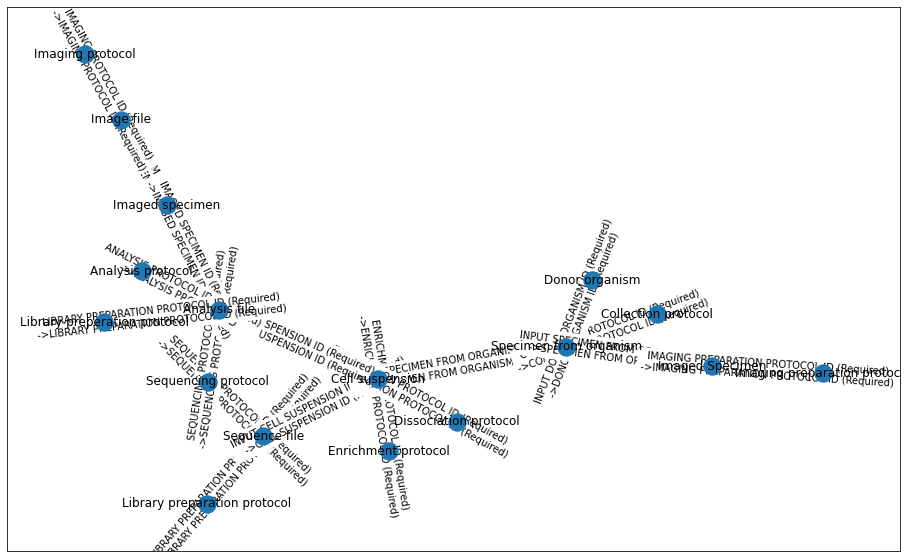

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
from functools import partial
%matplotlib inline


def add_link_to_graph(graph :nx.Graph, link :Link):
    map(graph.add_node, filter(lambda node:node not in graph.nodes, [link.source, link.target] ))
    graph.add_edge(link.source, link.target, keys=f'{link.source_field}\n->{link.target_field}')

G = nx.Graph()
x =list(map(partial(add_link_to_graph, G), links))

fig = plt.figure()
plt.figure(figsize=(16, 10))

labels = nx.get_edge_attributes(G, 'keys')
pos = nx.spring_layout(G)          
nx.draw_networkx(G, pos, arrowstyle="->",)
nx.draw_networkx_edge_labels(G, pos, labels, font_size=10)


In [131]:
col = 'ANALYSIS PROTOCOL ID (Required)'
sep='\|\|'
def explode_csv_col(df:pd.DataFrame, col, sep=',') -> pd.DataFrame:
    cols={}
    cols[col] = df[col].str.split(sep)
    return df.assign(**cols).explode(col)

In [132]:
def join_worksheet(worksheet, link:Link, spreadsheet):
    df = pd.read_excel(spreadsheet, link.target)
    print(f'joining {link.source} to {link.target} using fields {link.source_field} and {link.target_field}')
#     print(worksheet.columns)
#     print(df.columns)
    try:
        df = explode_csv_col(df, col=link.target_field)
        worksheet = explode_csv_col(worksheet, col=link.source_field)
        result = worksheet.merge(df, left_on=link.source_field, right_on=link.target_field, suffixes=('', '_drop'))
        result.drop([col for col in result.columns if '_drop' in col], axis=1, inplace=True)
    except RuntimeError as e:
        print(f'problem joining {link.source} to {link.target} using fields {link.source_field} and {link.target_field}: {e}')
        raise e
    return result

In [133]:
import pandas as pd
from collections import namedtuple
from functools import reduce

sequence_file = pd.read_excel(spreadsheet, report_entity)

flattened = reduce(partial(join_worksheet,spreadsheet=spreadsheet), 
                   links,
                   sequence_file)

joining Image file to Imaged specimen using fields INPUT IMAGED SPECIMEN ID (Required) and IMAGED SPECIMEN ID (Required)
joining Image file to Imaging protocol using fields IMAGING PROTOCOL ID (Required) and IMAGING PROTOCOL ID (Required)
joining Imaged Specimen to Specimen from organism using fields INPUT SPECIMEN FROM ORGANISM ID (Required) and SPECIMEN FROM ORGANISM ID (Required)
joining Imaged Specimen to Imaging preparation protocol using fields IMAGING PREPARATION PROTOCOL ID (Required) and IMAGING PREPARATION PROTOCOL ID (Required)
joining Specimen from organism to Collection protocol using fields COLLECTION PROTOCOL ID (Required) and COLLECTION PROTOCOL ID (Required)
joining Specimen from organism to Donor organism using fields INPUT DONOR ORGANISM ID (Required) and DONOR ORGANISM ID (Required)


In [134]:
from os.path import basename, splitext
report_entity_clean = report_entity.replace(" ","-")
flattened_filename = f'./examples/{splitext(basename(spreadsheet))[0]}_denormalised_{report_entity_clean}_v{version}.xlsx'
flattened.to_excel(flattened_filename)

In [135]:
import openpyxl
fh = openpyxl.load_workbook(flattened_filename)

obj = fh.properties   
project_info = pd.read_excel(spreadsheet, 'Project')
data_row_idx = 4
project_label = project_info['PROJECT LABEL (Required)'][data_row_idx]

fh.properties.title = f'flattened hca metadata for project {project_label} showing {report_entity}'
fh.properties.version = version
fh.properties.keywords = f'flattened,hca,metadata,{project_label},{report_entity_clean}'

fh.save(flattened_filename)

In [136]:
flattened

,FILE NAME (Required),FILE FORMAT (Required),CONTENT DESCRIPTION,CONTENT DESCRIPTION ONTOLOGY ID,CONTENT DESCRIPTION ONTOLOGY LABEL ONTOLOGY ID,FILE SOURCE,CHECKSUM,INPUT IMAGED SPECIMEN ID (Required),IMAGING PROTOCOL ID (Required),PROCESS ID (Required),...,HEIGHT UNIT ONTOLOGY LABEL ONTOLOGY ID,WEIGHT,WEIGHT UNIT,WEIGHT UNIT ONTOLOGY ID,WEIGHT UNIT ONTOLOGY LABEL ONTOLOGY ID,TIMECOURSE VALUE (Required),TIMECOURSE UNIT (Required),TIMECOURSE UNIT ONTOLOGY ID,TIMECOURSE UNIT ONTOLOGY LABEL ONTOLOGY ID,TIMECOURSE RELEVANCE
0,The name of the file.,The format of the file.,General description of the contents of the file.,An ontology term identifier in the form prefix...,The preferred label for the ontology term refe...,The source of the file. This is typically an o...,MD5 checksum of the file.,A unique ID for the biomaterial.,A unique ID for the protocol.,A unique ID for the process.,...,The preferred label for the ontology term refe...,Weight of organism in Weight unit.,A term that may be associated with a cell type...,An ontology term identifier in the form prefix...,The preferred label for the ontology term refe...,The numerical value in Timecourse unit associa...,A term that may be associated with a time unit...,An ontology term identifier in the form prefix...,The preferred label for the ontology term refe...,Relevance of the Timecourse value/unit to the ...
1,Include the file extension in the file name. F...,Indicate the full file extension including com...,For example: DNA sequence (raw); Sequence ali...,For example: data:3497; data:0863,For example: DNA sequence (raw); Sequence ali...,"Should be one of: DCP/2 Analysis, Contributor,...",For example: e09a986c2e630130b1849d4bf9a94c06,NaN,Protocol ID should have no spaces.,NaN,...,For example: micrometer; meter,Enter either a single value or a range of valu...,For example: kilogram; microgram,For example: UO:0000009; UO:0000023,For example: kilogram; microgram,Enter either a single value or a range of valu...,For example: second; week,For example: UO:0000010; UO:0000034,For example: second; week,For example: Collection after tumor cells inj...
2,image_file.file_core.file_name,image_file.file_core.format,image_file.file_core.content_description.text,image_file.file_core.content_description.ontology,image_file.file_core.content_description.ontol...,image_file.file_core.file_source,image_file.file_core.checksum,imaged_specimen.biomaterial_core.biomaterial_id,imaging_protocol.protocol_core.protocol_id,process.process_core.process_id,...,donor_organism.height_unit.ontology_label,donor_organism.weight,donor_organism.weight_unit.text,donor_organism.weight_unit.ontology,donor_organism.weight_unit.ontology_label,donor_organism.timecourse.value,donor_organism.timecourse.unit.text,donor_organism.timecourse.unit.ontology,donor_organism.timecourse.unit.ontology_label,donor_organism.timecourse.relevance
3,V10U24-112_F78-FTIL-0-FO-4_B1.ndpi,ndpi,image,data:2968,Image,ArrayExpress,NaN,6330STDY9479159imagespecimen,VisiumImaging,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,V10U24-112_F102-FPIL-0-FO-1_C1.ndpi,ndpi,image,data:2968,Image,ArrayExpress,NaN,6330STDY9479160imagespecimen,VisiumImaging,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,V10U24-113_Sst1-FGT-0-FO-2_B1.ndpi,ndpi,image,data:2968,Image,ArrayExpress,NaN,6330STDY9479163imagespecimen,VisiumImaging,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
